### I want to showcase my understanding of ESM time series model and evaluate its performance on stock data.

#### Importing Libraries

In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer

#### Define variables

In [2]:
stock_symbol = "AAPL"
start_date = "2018-01-01"
end_date = "2023-01-01"

#### Building the dataframe

In [3]:
df = yf.download(stock_symbol, start=start_date, end=end_date, interval="1wk")

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,42.540001,43.842499,42.314999,43.750000,41.425117,404673600
2018-01-08,43.587502,44.340000,43.250000,44.272499,41.919857,440790000
2018-01-15,44.474998,45.025002,43.767502,44.615002,42.244160,510284800
2018-01-22,44.325001,44.860001,42.514999,42.877499,40.598984,766299200
2018-01-29,42.540001,42.540001,40.025002,40.125000,37.992756,1051968400


In [22]:
# Choosing only the desired column for forecasting
# Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions. 
# Data is adjusted using appropriate split and dividend multipliers, 
# adhering to Center for Research in Security Prices (CRSP) standards.
data = df['Adj Close']

#### Splitting the data

In [23]:
train_data = data.iloc[:-10]  # Exclude the last two weeks for testing
test_data = data.iloc[-10:]

#### Preprocessing

In [24]:
# Create date index for the forecast
forecast_dates = pd.date_range(start=test_data.index[-1], periods=10, freq='W')

#### Modeling

In [27]:
# Fit the Exponential Smoothing State Space Model (ESM)
esm_model = statsmodels.tsa.holtwinters.ExponentialSmoothing(
    train_data, trend='add', seasonal='add', seasonal_periods=52
).fit()

# Forecast 10 weeks into the future
forecast = esm_model.forecast(steps=10)

C:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


#### Visualization

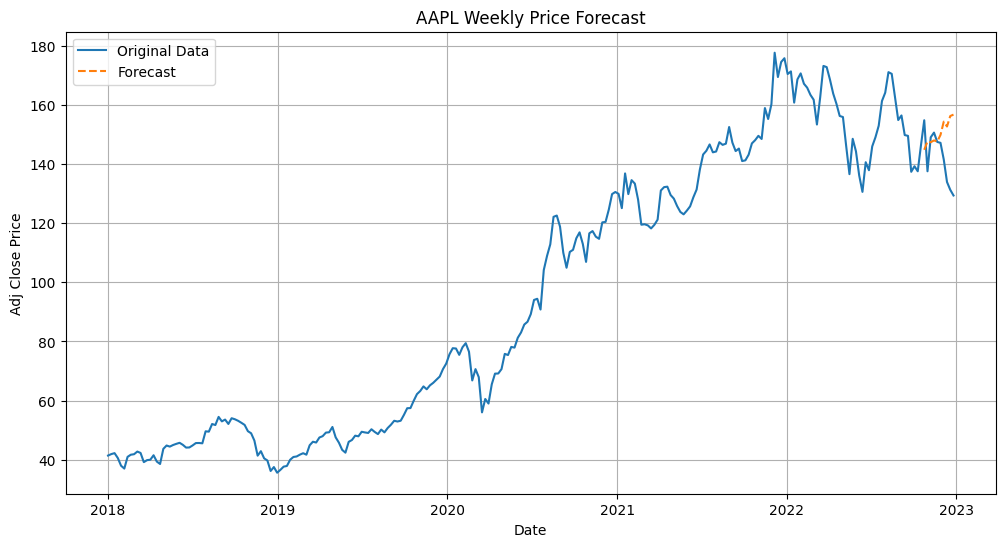

In [28]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title(f"{stock_symbol} Weekly Price Forecast")
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.legend()
plt.grid(True)
plt.show()

#### Accuracy Calculation

In [30]:
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 14.51


#### Hyper-parameter tuning

In [34]:
# Define the scoring function
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

param_grid = {
    'trend': ['add', 'multiplicative'],
    'seasonal': ['add', 'multiplicative'],
    'seasonal_periods': [52],
}

for trend in param_grid["trend"]:
    for seasonal in param_grid["seasonal"]:
        esm_model = statsmodels.tsa.holtwinters.ExponentialSmoothing(
            train_data, trend=trend, seasonal=seasonal, seasonal_periods=52
        ).fit()

        # Forecast 4 weeks into the future
        forecast = esm_model.forecast(steps=10)
        mse = mean_squared_error(test_data, forecast)
        rmse = np.sqrt(mse)
        print(f"For the model with Trend: {trend} and Seasonality: {seasonal}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

C:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


For the model with Trend: add and Seasonality: add
Root Mean Squared Error (RMSE): 14.51


C:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


For the model with Trend: add and Seasonality: multiplicative
Root Mean Squared Error (RMSE): 20.35


C:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


For the model with Trend: multiplicative and Seasonality: add
Root Mean Squared Error (RMSE): 14.42
For the model with Trend: multiplicative and Seasonality: multiplicative
Root Mean Squared Error (RMSE): 20.77


C:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


The model with multiplicative trand and additive seasonality seems to be the best match. Lets visualize the forecast of the model.

In [35]:
esm_model = statsmodels.tsa.holtwinters.ExponentialSmoothing(
    train_data, trend='mul', seasonal='add', seasonal_periods=52
).fit()

# Forecast 10 weeks into the future
forecast = esm_model.forecast(steps=10)

C:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


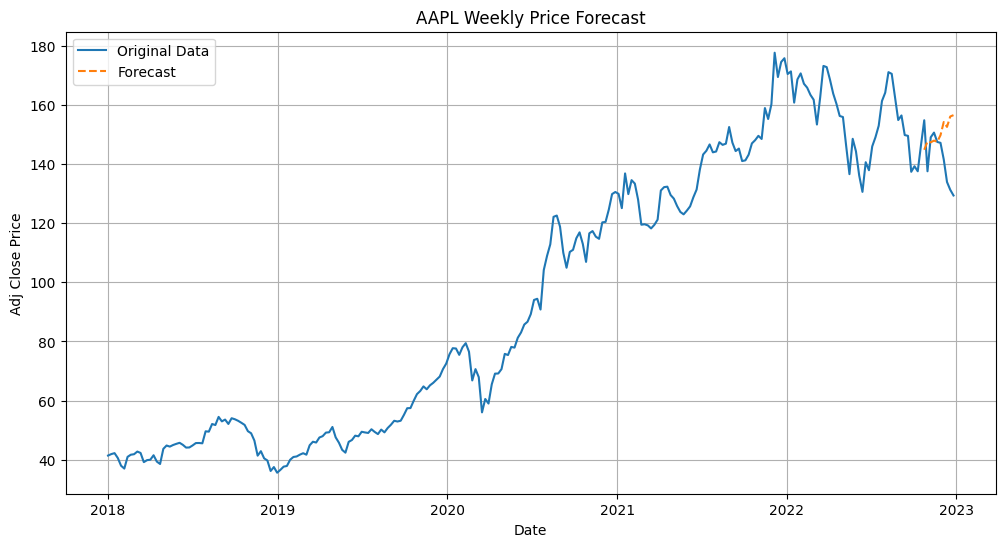

In [36]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title(f"{stock_symbol} Weekly Price Forecast")
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.legend()
plt.grid(True)
plt.show()